# **Lab 1 : Linear regression with NumPy**

In this notebook, you will implement a linear regressor for the house pricing problem. You will predict house prices training your predictor on previous collected data. 

The idea behind (multiple) linear regression is to extract a linear relation between features and target data which can be represented by the following equation:
\begin{equation}
y(x_1, x_2, \dots, x_n) = \theta_0 + \theta_1x_1 + \theta_2x_2+\dots + \theta_n x_n = \theta_0 + \sum_{i=1}^n \theta_i\cdot x_i.~~~~~~~~~~~~~~~~~~~
\end{equation}

In [1]:
# Import packages for data loading/manipulation
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# Dataset and utils
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Additional packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d

**Dataset loading**

The Boston Housing dataset contains prices of various houses in Boston depending on several parameters. The dataset contains 506 samples and 13 features. Your task is to fit a linear model and predict prices using unseen data after splitting the dataset into training (80%) and test (20%) set. The target variable is represented by the "MEDV" feature.

In [2]:
# Load dataset
dataset = load_boston()
print("Dataset loaded!")

Dataset loaded!


/usr/local/lib64/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [3]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [4]:
print(dataset.data)
print(f"\nThe dataset contains {dataset.data.shape[0]} samples and {dataset.data.shape[1]} features")

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

The dataset contains 506 samples and 13 features


In [5]:
print("Feature names:\n")
print(dataset.feature_names)

Feature names:

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Data analysis**

Before training a linear regressor, we will visualize the relationship between each feature and target data with histograms and scatter plots using the matplotlib library.

Let’s first plot the distribution of the target variable.

In [7]:
X = np.array(dataset.data) # Features
y = np.array(dataset.target) # Prices

print(f"X shape: {X.shape}. Target variable: {y.shape}")

X shape: (506, 13). Target variable: (506,)


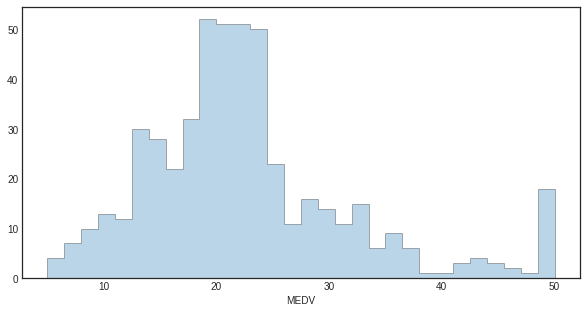

In [8]:
plt.figure(figsize=(10, 5))
kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=30, ec="k")
plt.hist(y, **kwargs)  
plt.xlabel("MEDV")
plt.show()

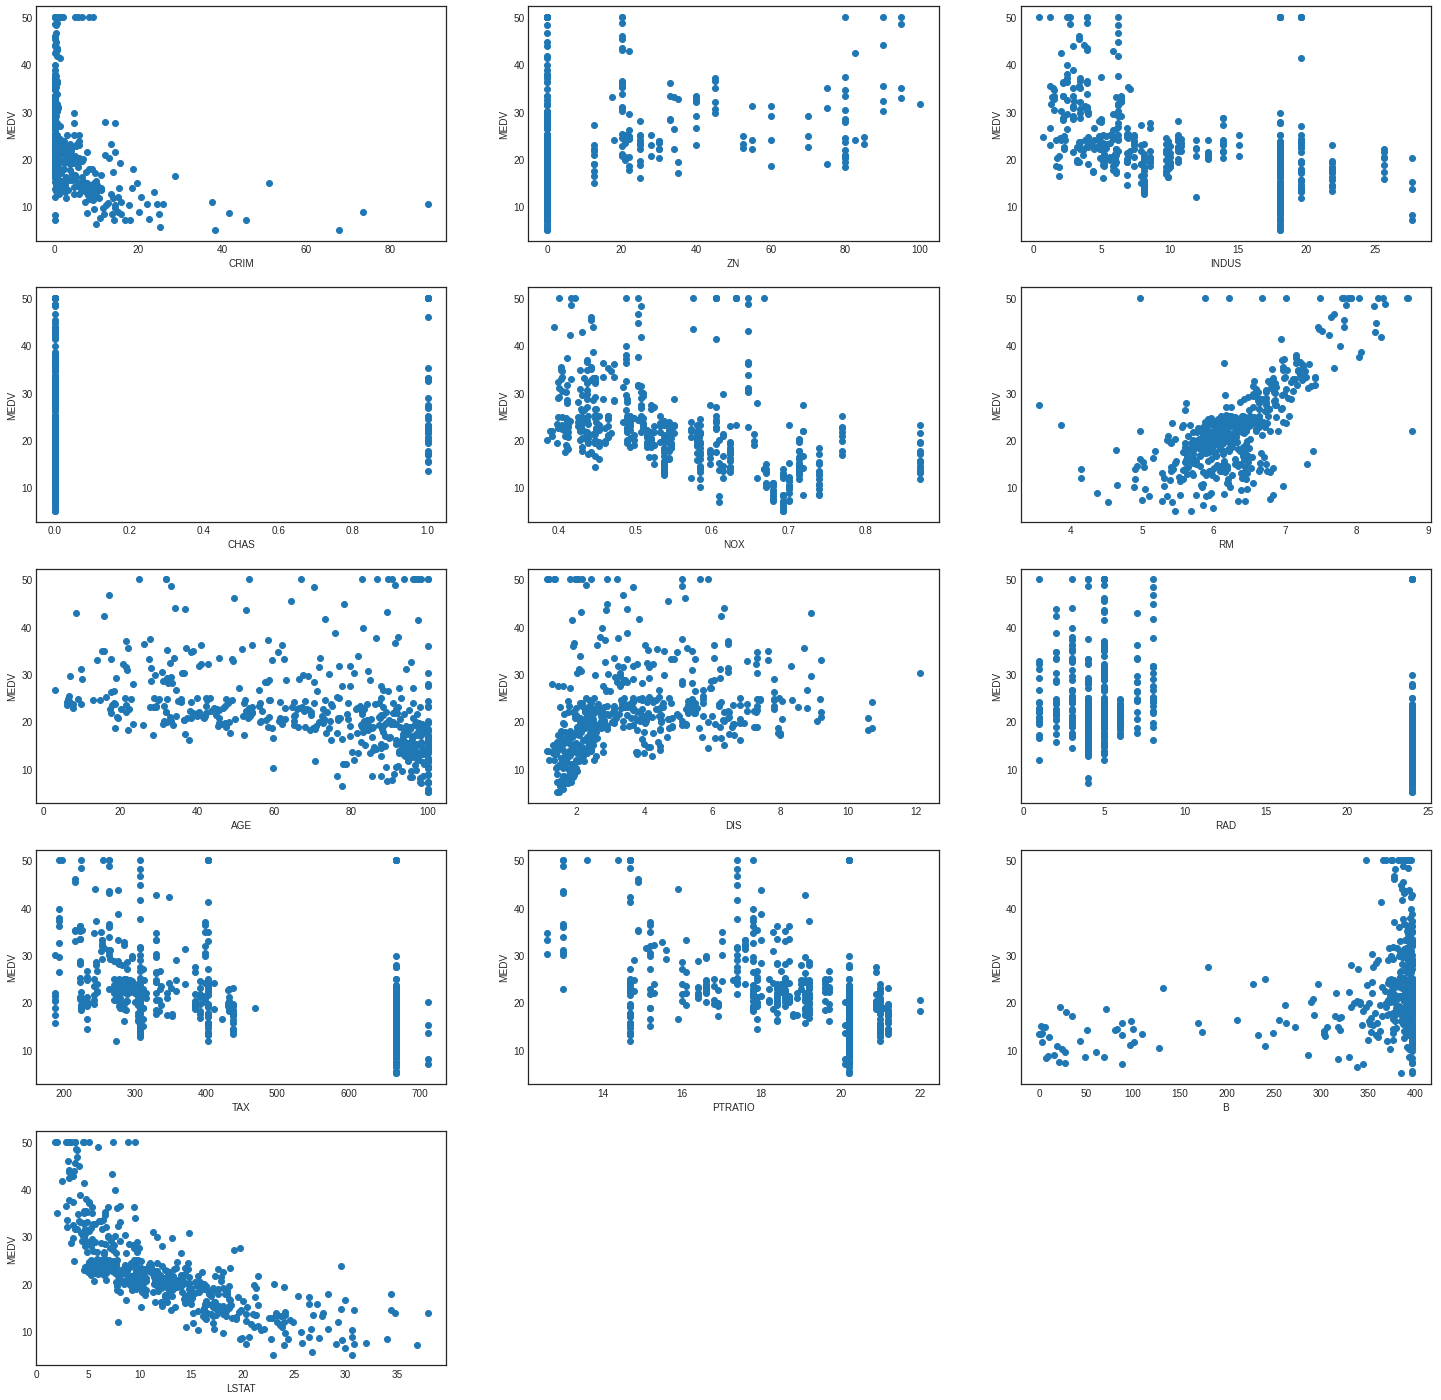

In [9]:
features = dataset.feature_names
plt.figure(figsize=(25, 25))  

for i, feature in enumerate(features):
  plt.subplot(5, 3 , i+1)
  # Select i-th feature
  x = X[:, i]
  # Scatter plot
  plt.scatter(x, y, marker='o')
  plt.xlabel(feature)
  plt.ylabel('MEDV')

# Simple linear regression

In simple linear regression, a single independent variable is used to predict the value of a dependent variable. Since it is hard to *visualize* our model with multiple features, we will first predict the house prices with just one variable and then move to the regression with all the features.
For example, we can select the ‘LSTAT’ feature which shows a negative correlation with the house prices.

\begin{equation}
y(x) = \theta_0 + \theta_1x
\end{equation}

In [10]:
# Select LSTAT feature from X
X_lstat = X[:, -1].reshape(-1,1)    #the LSTAT feature is the last one in the dataset 
y_price = y.reshape(-1,1)              #reshape(-1,1) is used to convert the array to a column vector

print(X_lstat.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [11]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(\
                X_lstat, y_price, test_size=0.2, random_state=5)    #random_state is used to set the seed for the random number generator

The objective of linear regression is to minimize the cost function

\begin{equation}
J(\theta_0, ..., \theta_n) = \frac{1}{2m}\sum_{i = 1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})^2 ~~~~~~~~~~~~~~~~~~~(2)
\end{equation}
where the hypothesis $h_{\theta}(x)$ is given by the linear model 

\begin{equation}
h_{\theta}(x) = {\theta}^Tx = \theta_0 + \theta_1x_1 + ... + \theta_nx_n. ~~~~~~~~~~~~~~~~~~~~~~~~(3)
\end{equation}

In each iteration, we perform the following update:

\begin{equation}
\theta_j := \theta_j-\alpha\frac{1}{m}(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(4)
\end{equation}

Firstly, we will implement our cost function $J(\theta)$ and then the gradient descent algorithm.

# Ex.1

Complete the following code to compute the cost function as reported in Equation (2).

In [12]:
# Loss function - Sum of Squared Errors (SSE)
def compute_cost(X, y, theta): 
  """
  Compute cost function as reported in Eq. (2)

  Input parameters
  ----------------
  X: np.array [num_samples x (num_features + 1)]
  y: np.array [num_samples x 1]
  theta: np.array [(num_features + 1) x 1]
  
  Output parameters
  -----------------
  J: float [1 x 1]

  """
  
  cost_f = 1/(2*X.shape[0]) * np.sum(( (X.dot(theta)) - y)**2)
  
  return cost_f

In [13]:
# # Check compute_cost function output
np.random.seed(1)
J = compute_cost(np.random.randint(1, 100, (50, 2)), np.random.randint(1, 50, (50, 1)), np.array([[0], [0]]))
print(J)

317.34000000000003


 * The output should be 317.34

# Ex.2

Implement the gradient descent algorithm for simple linear regression, as reported in Equation (4), using the following steps:

Repeat until convergence (or maximum number of iterations) {
  1. Update each theta using Eq. (4);
  2. Compute cost
  
}


In [14]:
def gradient_descent(X, y, theta, learning_rate, num_iters):
  """
  Gradient descent algorithm

  Input parameters
  ----------------
  X: np.array [num_samples x (num_features + 1)]
  y: np.array [num_samples x 1]
  theta: np.array [(num_features + 1) x 1]
  learning_rate: int [1 x 1]
  num_iter: int [1 x 1]

  Output parameters
  -----------------
  theta: np.array [(num_features + 1) x 1]
  theta_history: np.array [(num_features + 1) x num_iters]
  J_history: int [num_iters x 1] computed at each iteration
  """
  theta_history = np.zeros((theta.shape[0],num_iters))
  J_history = np.zeros((num_iters,1))
  temp_theta = theta
  
  for i in range(num_iters):
    for j in range(theta.shape[0]):
      temp_theta[j, 0] = temp_theta[j, 0] - learning_rate / X.shape[0] * np.sum((X.dot(theta) - y) * X[:, j].reshape(-1, 1))
    theta = temp_theta
    
    theta_history[:, i] = theta[:, 0]
    J_history[i] = compute_cost(X, y, theta)
    
  return (theta, theta_history, np.array(J_history))
  

In [15]:
# Check gradient_descent function output
np.random.seed(2)
theta, theta_history, J_history = \
      gradient_descent(np.random.randint(1, 50, (25, 2)), 
                       np.random.randint(1, 25, (25, 1)), 
                       np.array([[0], [0]]), 
                       0.005, 4)
print(f"Theta: {theta}, \ntheta_history: {theta_history}, \nJ_history: {J_history}")

Theta: [[-15]
 [-12]], 
theta_history: [[  1.   0. -10. -15.]
 [ -1.   4.  18. -12.]], 
J_history: [[   380.7 ]
 [  5859.32]
 [ 77062.12]
 [292115.72]]


* The output should be

Theta: [[-15]\
 [-12]], \
theta_history: [[  1.   0. -10. -15.]\
 [ -1.   4.  18. -12.]], \
J_history: [[   380.7 ]\
 [  5859.32]\
 [ 77062.12]\
 [292115.72]]

In [16]:
# Add intercept term to X_train
print(f"X_train shape: {X_train.shape} (without intercept term)")
X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))
print(f"X_train shape: {X_train.shape} (with intercept term)")

X_train shape: (404, 1) (without intercept term)
X_train shape: (404, 2) (with intercept term)


In [17]:
# Define and initialize parameters
theta = np.zeros((X_train.shape[1], 1))
print(f"{theta}")

[[0.]
 [0.]]


In [18]:
num_iters = 3000
learning_rate = 0.005
initial_cost = compute_cost(X_train, y_train, theta)
print("J (initial): ", initial_cost, "\n")

J (initial):  299.38922029702974 



In [19]:
# Apply gradient descent algorithm
(theta, theta_history, J_history) = gradient_descent(X_train, y_train, theta, learning_rate, num_iters)
print(f"Optimal parameters: [{theta[0]}, {theta[1]}]")
print(f"J (final): {J_history[-1]}")

Optimal parameters: [[33.93744029], [-0.92290583]]
J (final): [19.33442848]


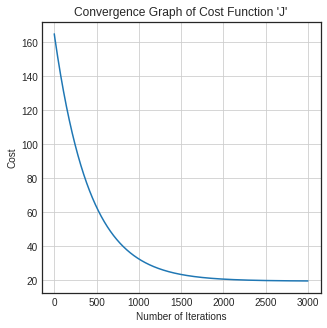

In [20]:
# Plot J history
plt.figure(figsize=(5, 5))  
plt.plot(range(len(J_history)), J_history)
plt.title("Convergence Graph of Cost Function 'J'")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()

* Plot fitted model

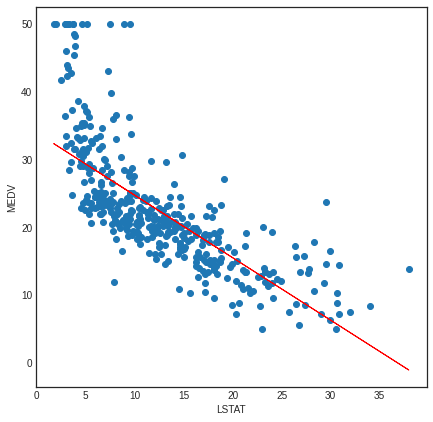

In [21]:
plt.figure(figsize=(7, 7))  
plt.scatter(X_train[:,1], y_train)

# Predict values from training data
out = theta[0] + X_train[:,1] * theta[1]

plt.plot(X_train[:,1], out, 'r-', linewidth = 1)
plt.ylabel('MEDV')
plt.xlabel('LSTAT')
plt.show()

# Ex. 3

Perform simple linear regression using as indipendent variable the "RM" feature.
The fitted model should be similar to the following one:

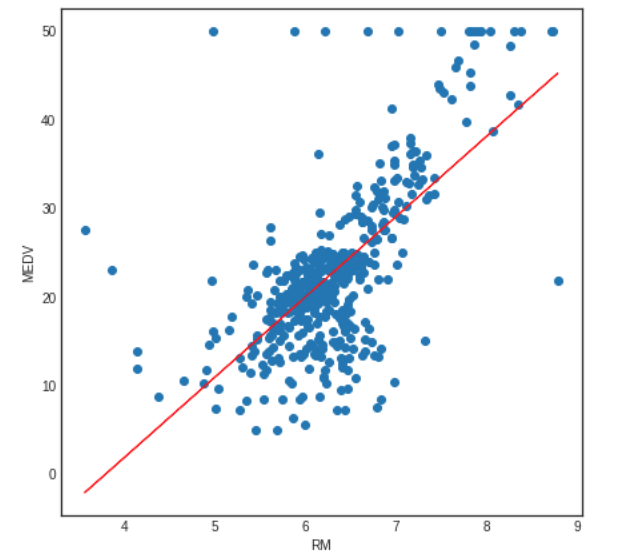

In [23]:
# Select RM feature from X
X_rm = X[:, 5].reshape(-1,1)    #the RM feature is the 6th one in the dataset
y_price = y.reshape(-1,1)              #reshape(-1,1) is used to convert the array to a column vector

print(X_rm.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [24]:
# Split dataset into training and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(\
                X_rm, y_price, test_size=0.2, random_state=5)    #random_state is used to set the seed for the random number generator

In [25]:
# Add intercept term to X_train
print(f"X_train_2 shape: {X_train_2.shape} (without intercept term)")
X_train_2 = np.hstack((np.ones((X_train_2.shape[0],1)), X_train_2))
print(f"X_train_2 shape: {X_train_2.shape} (with intercept term)")

print('\n')
# Define and initialize parameters
theta_2 = np.zeros((X_train_2.shape[1], 1))
print(f"{theta_2}")

print('\n')
num_iters = 3000
learning_rate = 0.005
initial_cost_2 = compute_cost(X_train_2, y_train_2, theta_2)
print("J (initial): ", initial_cost_2, "\n")

X_train_2 shape: (404, 1) (without intercept term)
X_train_2 shape: (404, 2) (with intercept term)


[[0.]
 [0.]]


J (initial):  299.38922029702974 



In [26]:
# Apply gradient descent algorithm
(theta_2, theta_history_2, J_history_2) = gradient_descent(X_train_2, y_train_2, theta_2, learning_rate, num_iters)
print(f"Optimal parameters: [{theta_2[0]}, {theta_2[1]}]")
print(f"J (final): {J_history_2[-1]}")

Optimal parameters: [[-4.82721684], [4.42123291]]
J (final): [29.00142373]


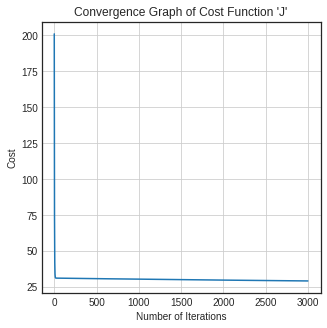

In [27]:
# Plot J history
plt.figure(figsize=(5, 5))  
plt.plot(range(len(J_history_2)), J_history_2)
plt.title("Convergence Graph of Cost Function 'J'")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()

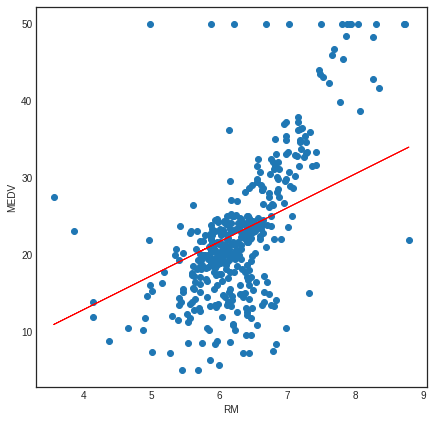

In [28]:
plt.figure(figsize=(7, 7))  
plt.scatter(X_train_2[:,1], y_train_2)

# Predict values from training data
out = theta_2[0] + X_train_2[:,1] * theta_2[1]

plt.plot(X_train_2[:,1], out, 'r-', linewidth = 1)
plt.ylabel('MEDV')
plt.xlabel('RM')
plt.show()

# $J(\theta_0, \theta_1)$ Visualization

To better understand the cost function, you can plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values.

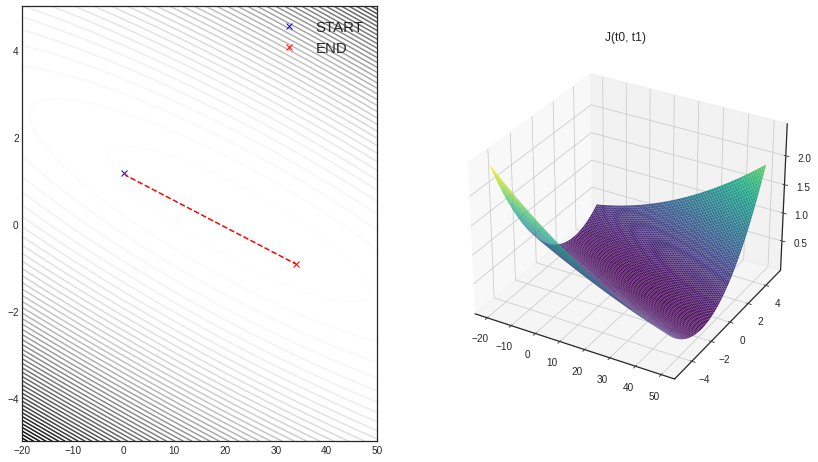

In [29]:
fig = plt.figure(figsize=(14,8)) # create the canvas for plotting
ax1 = fig.add_subplot(1,2,1)

# Create grid of theta_0/theta_1 values
theta0_values = np.linspace(-20, 50, 100);
theta1_values = np.linspace(-5, 5, 100);
T0, T1 = np.meshgrid(theta0_values, theta1_values)
J = np.zeros((theta0_values.shape[0] * theta1_values.shape[0]))

# Compute cost function for each point in the grid
for i, (t0,t1) in enumerate(zip(T0.reshape(-1), T1.reshape(-1))):
  theta = [t0, t1]
  J[i] = compute_cost(X_train, y_train, theta)

J = J.reshape(theta0_values.shape[0], theta1_values.shape[0])   

# Plot cost function
plt.contour(T0, T1, J, 50)

# Plot theta history
plt.plot(theta_history[0, 0], theta_history[1, 0], 'bx', # INITIAL POSITION
         theta_history[0, -1], theta_history[1, -1], 'rx', # FINAL POSITION
         theta_history[0, ::10], theta_history[1, ::10], 'r--')
plt.legend(['START', 'END'], fontsize=15)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(T0, T1, J, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax2.set_title('J(t0, t1)')
plt.show()

# Multiple Linear Regression
Features in a dataset may differ by orders of magnitude. To perform multiple linear regression we will firstly apply a *feature scaling* technique to make the gradient descent algorithm to converge much more quickly.

We will consider a normalization technique called *Standardization*:

\begin{equation}
z = \frac{x - \mu}{\sigma}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(5)
\end{equation}
where
\begin{equation}
\mu = \frac{1}{m}\sum_{i=1}^m x_i,~~~\sigma = \sqrt{\frac{1}{m}\sum_{i=1}^m (x_i-\mu)^2}. ~~~~~~~~~~~~~~~~~~~(6)
\end{equation}

In [36]:
# Use all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# Compute training set mean
mu = np.mean(X_train, axis = 0)
# Compute training set standard deviation
sigma = np.std(X_train, axis = 0)

# Normalize training set
X_train_norm = (X_train - mu) / sigma
y_train = y_train.reshape(-1, 1)
print(f"X_train shape: {X_train_norm.shape}\ny_train shape: {y_train.shape}")

X_train shape: (404, 13)
y_train shape: (404, 1)


**Implementation detail**: For the multivariate case, we need to consider the vectorized form of the cost function:

\begin{equation}
J(\theta) = \frac{1}{2m}(X\theta-y)^T(X\theta-y) ~~~~~~~~~~~~~~~~~~~(7)
\end{equation}

# Ex.4
Implement the cost function for the multivariate case as reported in Equation (7).

(Note that this function will replace the one defined for simple linear regression.)

In [37]:
# Loss function - Sum of Squared Errors (SSE)
def compute_cost(X, y, theta):
  """
  Compute cost function as reported in Eq. (7)

  Input parameters
  ----------------
  X: np.array [num_samples x (num_features + 1)]
  y: np.array [num_samples x 1]
  theta: np.array [(num_features + 1) x 1]
  
  Output parameters
  -----------------
  J: float [1 x 1]

  """
  
  cost_f2 = 1/(2*X.shape[0]) * (X.dot(theta) - y).T.dot(X.dot(theta) - y)
  
  return cost_f2
  

In [38]:
# Check compute_cost function output
np.random.seed(2)
J = compute_cost(np.random.randint(1, 100, (25, 5)), 
                       np.random.randint(1, 100, (25, 1)), 
                       np.zeros((5,1)))
print(f"J: {J}") # Output should be 2101.9

J: [[2101.9]]


In [39]:
# Add intercept term to X_train 
X_train_norm = np.hstack((np.ones((X_train_norm.shape[0],1)), X_train_norm))
print(f"X_train_norm shape: {X_train_norm.shape}")

X_train_norm shape: (404, 14)


In [40]:
# Define and initialize theta parameters
theta = np.zeros((X_train_norm.shape[1], 1))
print(f"Theta shape: {theta.shape}")

Theta shape: (14, 1)


In [41]:
# Hyper-parameters
num_iters = 400
learning_rate = 0.01
initial_cost = compute_cost(X_train_norm, y_train, theta)
print("Initial cost is: ", initial_cost, "\n")

Initial cost is:  [[289.61050743]] 



In [42]:
(theta, _, J_history) = gradient_descent(X_train_norm, y_train, theta, learning_rate, num_iters)
print("Theta: \n", theta, "\n")
print("Final cost is: ", J_history[-1])

Theta: 
 [[21.89800109]
 [-0.67327291]
 [ 0.45809881]
 [-0.51158639]
 [ 0.85863514]
 [-0.85219707]
 [ 3.20616578]
 [-0.25843359]
 [-1.97650329]
 [ 0.69022601]
 [-0.60385854]
 [-1.79308756]
 [ 0.78622718]
 [-3.04355476]] 

Final cost is:  [11.18701098]


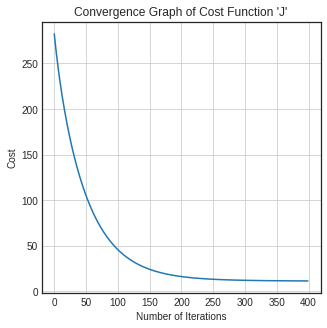

In [43]:
plt.figure(figsize=(5, 5))  
plt.plot(range(len(J_history)), J_history)
plt.title("Convergence Graph of Cost Function 'J'")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()

In [44]:
# Predict new values
def predict(X, mu, sigma, theta):
  """
  Predict new values

  Input parameters
  ----------------
  X: np.array [num_samples x num_features]
  mu: np.array [num_features x 1]
  sigma: np.array [num_features x 1]
  theta: np.array [(num_features + 1) x 1]
  
  Output parameters
  -----------------
  y: float [num_samples x 1]

  """
  num_samples = X.shape[0]
  
  # Normalize input data with mu and sigma computed from the training set
  X_norm = (X - mu) / sigma
  
  # Compute X*theta
  y = np.dot(np.hstack((np.ones((num_samples, 1)), X_norm)), theta)
  
  return y

In [45]:
# Predicted prices for the test set
y_pred = predict(X_test, mu, sigma, theta)
print(y_pred.shape)

(102, 1)


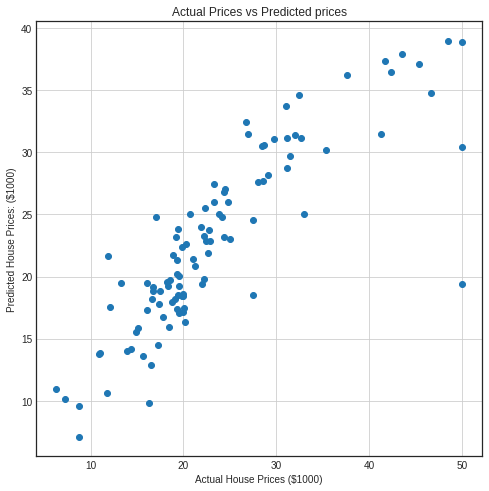

In [46]:
# Plot difference between actual prices and predicted values
plt.figure(figsize=(8, 8))  
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.title("Actual Prices vs Predicted prices")
plt.grid('on')
plt.show()

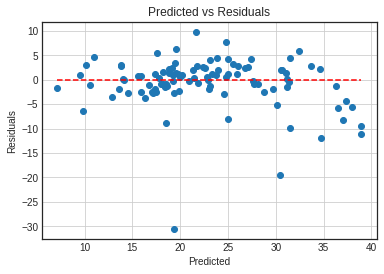

In [47]:
# Plot Residuals
plt.scatter(y_pred, y_pred - y_test.reshape(-1,1))
#The expected error is 0
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed', colors='red')
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid('on')
plt.show()

# Performance evaluation

To evaluate the performance of our linear model, we will use the RMSE metric. We will also compare our model to the *Scikit-learn* linear regressor.

In [48]:
sklearn_reg = LinearRegression()
sklearn_reg.fit(X_train, y_train)
# Sklearn linear regressor - TRAIN
y_train_pred_skl = sklearn_reg.predict(X_train)
# Sklearn linear regressor - TEST
y_test_pred_skl = sklearn_reg.predict(X_test)
# RMSE sklearn regressor
rmse_skl_train = (np.sqrt(mean_squared_error(y_train, y_train_pred_skl)))
rmse_skl_test = (np.sqrt(mean_squared_error(y_test, y_test_pred_skl)))

# Our regressor - TRAIN
y_train_pred_our = predict(X_train, mu, sigma, theta)
# RMSE ours
rmse_our_train = (np.sqrt(mean_squared_error(y_train, y_train_pred_our)))
rmse_our_test = (np.sqrt(mean_squared_error(y_test, y_pred)))

print("Model performance (RMSE)")
print("------------------------")
print("\t Sklearn \t Ours")
print('Train \t {:.3f} \t\t {:.3f}'.format(rmse_skl_train, rmse_our_train))
print('Test \t {:.3f} \t\t {:.3f}'.format(rmse_skl_test, rmse_our_test))

Model performance (RMSE)
------------------------
	 Sklearn 	 Ours
Train 	 4.604 		 4.730
Test 	 5.042 		 5.224


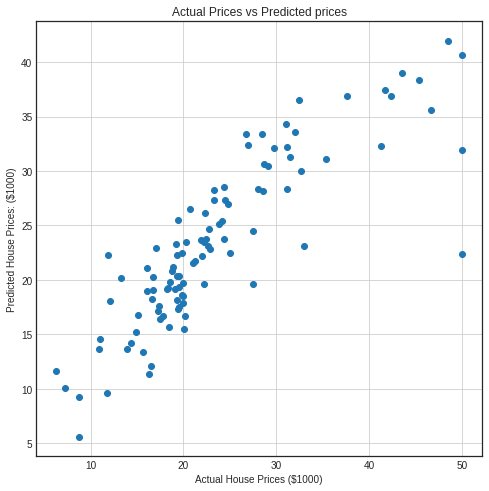

In [42]:
# Plot difference between actual prices and predicted values (Sklearn)
plt.figure(figsize=(8, 8))  
plt.scatter(y_test, y_test_pred_skl)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.title("Actual Prices vs Predicted prices")
plt.grid('on')
plt.show()

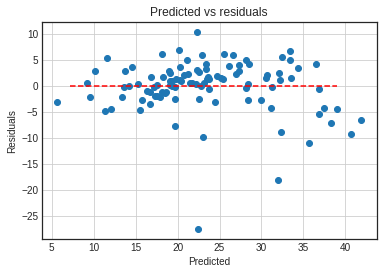

In [43]:
# Plot Residuals (Sklearn)
plt.scatter(y_test_pred_skl, y_test_pred_skl - y_test.reshape(-1,1))
#The expected error is 0
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed', colors='red')
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid('on')
plt.show()

# Additional 1
Try different learning rates to converge faster (use a log-scale).

# Additional 2

Linear regression problems can also be solved (in one step) in closed-form using the following formula:

$\theta = (X^T X)^{-1}X^Ty$.

Such formula does not require any feature scaling but you still
need to add a column of 1’s to the X matrix to have an intercept term.

Implement the above formula in the additional exercise.

In [54]:
def normalEqn(X, y):
  """
  Computes the closed-form solution to linear regression using the normal equations.

  Input parameters
  ----------------
  X: np.array [num_samples x num_features]
  y: np.array [num_samples x 1]
    
  Output parameters
  -----------------
  theta: np.array [(num_features + 1) x 1]
  """

  theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
  
  return theta

In [55]:
# # Check normalEqn function output
np.random.seed(1)
theta_check = normalEqn(np.random.randint(1, 100, (50, 2)), np.random.randint(1, 50, (50, 1)))
print(theta_check)

[[0.20798672]
 [0.16799718]]


* The output should be: \
[[0.20798672]\
 [0.16799718]]

In [56]:
theta_ne = normalEqn(np.hstack((np.ones((X_train.shape[0],1)), X_train)), y_train)
print(theta_ne.shape)

(14, 1)


In [57]:
y_pred_ne = np.dot(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), theta_ne)

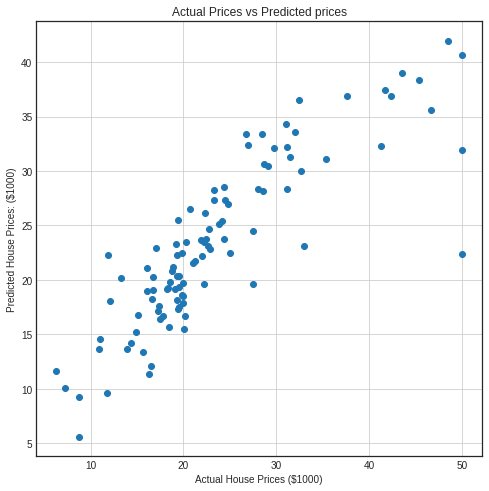

In [58]:
# Plot difference between actual prices and predicted values
plt.figure(figsize=(8, 8))  
plt.scatter(y_test, y_pred_ne)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.title("Actual Prices vs Predicted prices")
plt.grid('on')
plt.show()

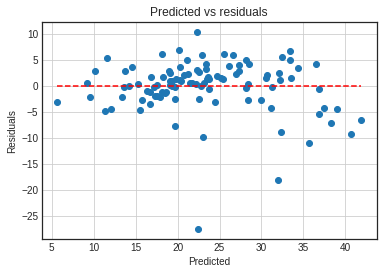

In [59]:
# Plot Residuals
plt.scatter(y_pred_ne, y_pred_ne - y_test.reshape(-1,1))
#The expected error is 0
plt.hlines(y=0, xmin=y_pred_ne.min(), xmax=y_pred_ne.max(), linestyles='dashed', colors='red')
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid('on')
plt.show()

In [61]:
# RMSE Normal Equation
y_pred_ne_train = np.dot(np.hstack((np.ones((X_train.shape[0], 1)), X_train)), theta_ne)
rmse_ne_train = (np.sqrt(mean_squared_error(y_train, y_pred_ne_train)))
rmse_ne_test = (np.sqrt(mean_squared_error(y_test, y_pred_ne)))

print("Model performance (RMSE)")
print("------------------------")
print("\t Normal Equation")
print('Train \t     {:.3f}'.format(rmse_ne_train))
print('Test  \t     {:.3f}'.format(rmse_ne_test))

Model performance (RMSE)
------------------------
	 Normal Equation
Train 	     4.604
Test  	     5.042
